In [2]:
from maelzel.core import *
w = getWorkspace()
cfg = w.config
cfg['show.backend'] = 'musicxml'
logger.setLevel('DEBUG')


[maelzel.core:chain.py:1210:_scoringParts:INFO] Spanners across multiple staves are not supported
[maelzel.core:chain.py:1210:_scoringParts:INFO] Spanners across multiple staves are not supported


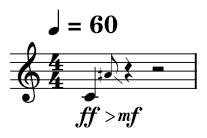

In [3]:
n = Note(60, dynamic='ff', gliss=True)
m = Note("4A+!", dur=0)
o = Rest(1, dynamic='mf')
ch = Chain([n, m, o])
ch.addSpanner('>')
ch.write('~/tmp/test.musicxml')
ch.show()

[maelzel.core:chain.py:1210:_scoringParts:INFO] Spanners across multiple staves are not supported


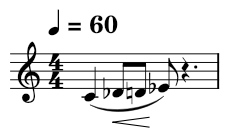

In [4]:
ch = Chain([
    Note(60, 1).addSpanner('slur'),
    Note(61, 0.5).addSpanner('<'), 
    Note(62, 0.5),
    Note(63, 0.5).addSpanner('~<').addSpanner('~slur')
])
# ch.dump()
ch.show()


[maelzel.core:mobj.py:2285:clearImageCache:INFO] Resetting image cache
[maelzel.core:chain.py:1210:_scoringParts:INFO] Spanners across multiple staves are not supported


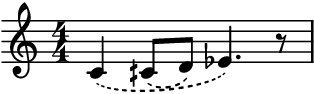

[maelzel.core:chain.py:1210:_scoringParts:INFO] Spanners across multiple staves are not supported


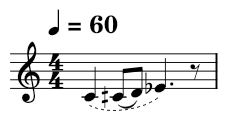

[maelzel.core:chain.py:1210:_scoringParts:INFO] Spanners across multiple staves are not supported
[maelzel.core:chain.py:1210:_scoringParts:INFO] Spanners across multiple staves are not supported


Part #0:
  Measure #0
    Timesig: 4/4(quarter=60)
    Node ratio: 1/1, offset=0, end=4, dur=4, symbolicdur=4
      «4C! 1♩ spanners=[Slur(kind=start, linetype=dashed, nestingLevel=1, uuid=dm0fc0xi)]»
      «4C+! 1/2♩ spanners=[Slur(kind=start, linetype=solid, nestingLevel=2, uuid=o0ss2jnf)]»
      «4D! 1/2♩ spanners=[Slur(kind=end, linetype=solid, nestingLevel=2, uuid=o0ss2jnf)]»
      «4Eb! 3/2♩ spanners=[Slur(kind=end, linetype=dashed, nestingLevel=1, uuid=dm0fc0xi)]»
      «r 1/2♩»


In [5]:
# Multiple slurs
ch = Chain([
    Note(60, 1),
    Note(60.5, 0.5), 
    Note(62, 0.5),
    Note(63, 1.5)
])
ch[0].addSpanner(symbols.Slur(linetype='dashed'), ch[3])
ch[1].addSpanner('slur', ch[2])
ch.show(backend='lilypond')
ch.show(backend='musicxml')
ch.write('~/tmp/slurs.ly')
q = ch.quantizedScore()
q.dump()

## Hairpins

[maelzel.core:chain.py:1210:_scoringParts:INFO] Spanners across multiple staves are not supported


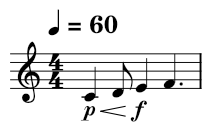

In [7]:
from maelzel.core import *
w = getWorkspace()
cfg = w.config
cfg['show.backend'] = 'musicxml'
logger.setLevel('DEBUG')

chain = Chain([
    Note("4C", 1, dynamic='p').addSpanner("<"),
    Note("4D", 0.5),
    Note("4E", dynamic='f'),   # This ends the hairpin spanner
    Note("4F", 1.5)   # This ends the hairpin spanner
    
])
chain.dump()
chain.show()


In [8]:
def f():
    for _  in range(10000):
        chain._changed()
        chain._update()
%prun f()

         480557 function calls (480522 primitive calls) in 0.520 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10000    0.088    0.000    0.233    0.000 chain.py:2652(_resolveGlissandi)
80131/80098    0.081    0.000    0.172    0.000 {built-in method builtins.isinstance}
    10000    0.076    0.000    0.174    0.000 chain.py:2739(_stackEvents)
      2/1    0.059    0.030    0.401    0.401 <string>:1(<module>)
    80000    0.048    0.000    0.048    0.000 {built-in method _abc._abc_instancecheck}
    80000    0.043    0.000    0.091    0.000 <frozen abc>:117(__instancecheck__)
    50000    0.031    0.000    0.116    0.000 chain.py:551(_recurse)
    60000    0.019    0.000    0.019    0.000 event.py:459(isRest)
    10000    0.018    0.000    0.440    0.000 chain.py:789(_update)
    10000    0.014    0.000    0.248    0.000 chain.py:558(_resolveGlissandi)
        1    0.011    0.011    0.401    0.401 722105254.py:1(f)
  

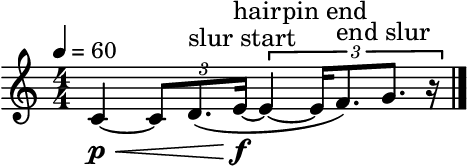

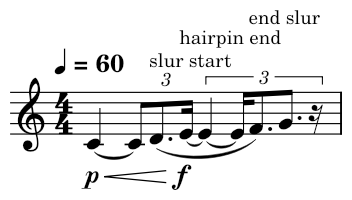

Measure #0
  Timesig: 4/4(quarter=60)
  Node ratio: 1/1, offset=0, end=4, dur=4, symbolicdur=4
    Node ratio: 1/1, offset=0, end=1, dur=1, symbolicdur=1
      «4C~ 0:1 1♩ p spanners=[Hairpin(direction=<, kind=start, linetype=solid, nestingLevel=1,
        uuid=zkccy2eb)]»
    Node ratio: 3/2, offset=1, end=2, dur=1, symbolicdur=3/2
      «~4C 1:1.333 1/3♩ 3/2»
      «4D 1.333:1.833 1/2♩ 3/2 attachments=[Text(text=slur start, fontsize=9.0)]
        spanners=[Slur(kind=start, linetype=solid, nestingLevel=1, parent=«4D 1.333:1.833 1/2♩ 3/2
        attachments=[Text(text=slur start, fontsize=9.0)] spanners=[...]», uuid=kf3tzl40)]»
      «4E~ 1.833:2 1/6♩ 3/2 f attachments=[Text(text=hairpin end, fontsize=9.0)]
        spanners=[Hairpin(direction=<, kind=end, linetype=solid, nestingLevel=1, uuid=zkccy2eb)]»
    Node ratio: 3/2, offset=2, end=4, dur=2, symbolicdur=3
      «~4E~ 2:2.667 2/3♩ 3/2»
      «~4E 2.667:2.833 1/6♩ 3/2»
      «4F 2.833:3.333 1/2♩ 3/2 attachments=[Text(text=end slur,

In [5]:
chain = Chain([
    Note("4C", 1+F(1, 3), dynamic='p').addSpanner("<"),
    Note("4D", 0.5, label='slur start').addSpanner("slur"),
    Note("4E", dynamic='f', label='hairpin end'),   
    Note("4F", 0.5, label='end slur').addSpanner('~slur'),  # This ends the slur
    Note("4G", 0.5),
])
chain.show(backend='lilypond')
chain.show(backend='musicxml')
q = chain.quantizedScore().parts[0].dump()

